In [12]:
%load_ext autoreload
%autoreload 2
%matplotlib inline  
from src.data import make_dataset
from src.features import build_features
from src.models import train_model
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from matplotlib import pyplot
sns.set_style("darkgrid")
#sns.set_context('talk')
sns.set_context('paper')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
hour_df = make_dataset.get_raw_dataset('../data/raw')

# EDA

## Descriptive

In [3]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [4]:
hour_df.shape

(17379, 17)

In [5]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [6]:
hour_df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [7]:
hour_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

## Types

In [8]:
interm_df = hour_df.copy()
interm_df = build_features.cast_column_type(interm_df)
interm_df = build_features.drop_columns(interm_df)
interm_df.dtypes

season        category
yr               int64
mnth          category
hr            category
holiday       category
weekday       category
workingday    category
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual           int64
registered       int64
cnt              int64
dtype: object

## Outlier

[[Text(0, 0, 'spring'),
  Text(0, 0, 'summer'),
  Text(0, 0, 'fall'),
  Text(0, 0, 'winter')]]

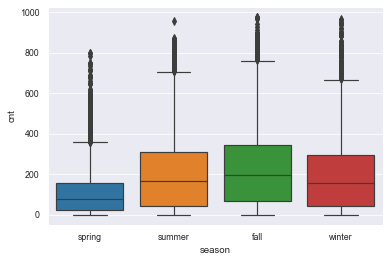

In [13]:
g = sns.boxplot(x='season', y='cnt', data=interm_df)
g.set(xticklabels=['spring', 'summer', 'fall', 'winter'])

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Hour')]

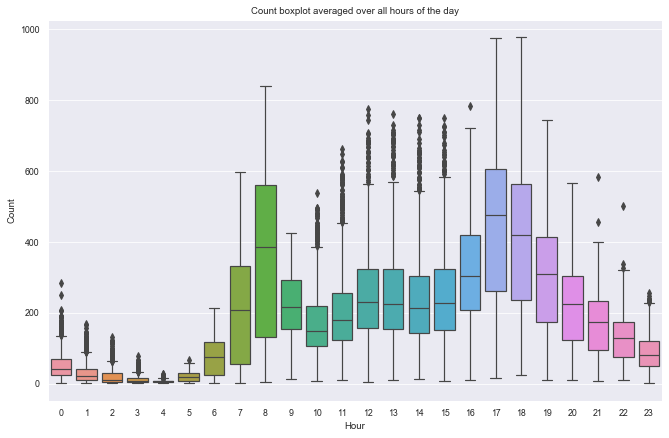

In [14]:
_, ax = pyplot.subplots(figsize=(11, 7))
g = sns.boxplot(ax=ax, x='hr', y='cnt', data=interm_df)
g.set_title('Count boxplot averaged over all hours of the day')
ax.set(xlabel='Hour', ylabel='Count')

## Correlations

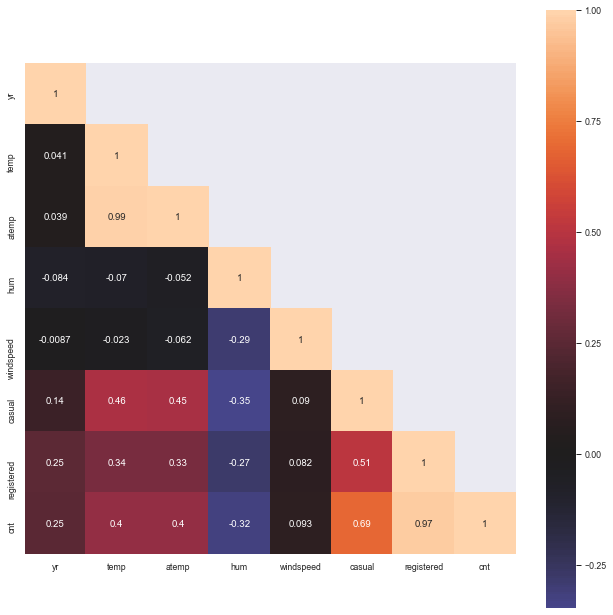

In [15]:
_, ax= pyplot.subplots(figsize=(11,11))

corr = interm_df.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
g = sns.heatmap(corr, annot=True, ax=ax, square=True, mask=mask, center=0)

## Distribution

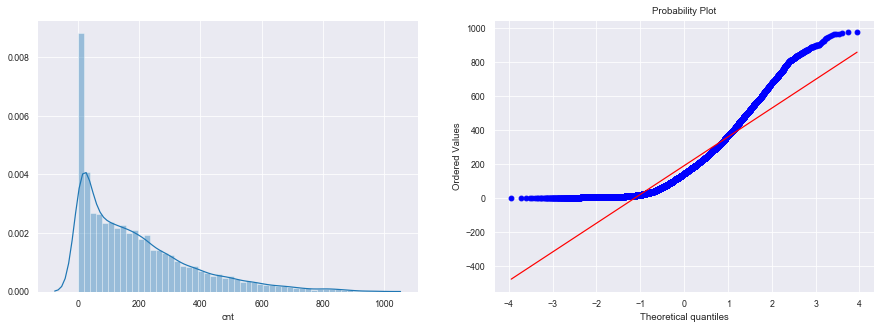

In [16]:
def plot_dist(df):
    _,ax = pyplot.subplots(ncols=2,nrows=1, figsize=(15, 5))
    sns.distplot(df['cnt'],ax=ax[0])
    stats.probplot(df['cnt'], dist='norm', fit=True, plot=ax[1])
    
plot_dist(interm_df)

## Visualization

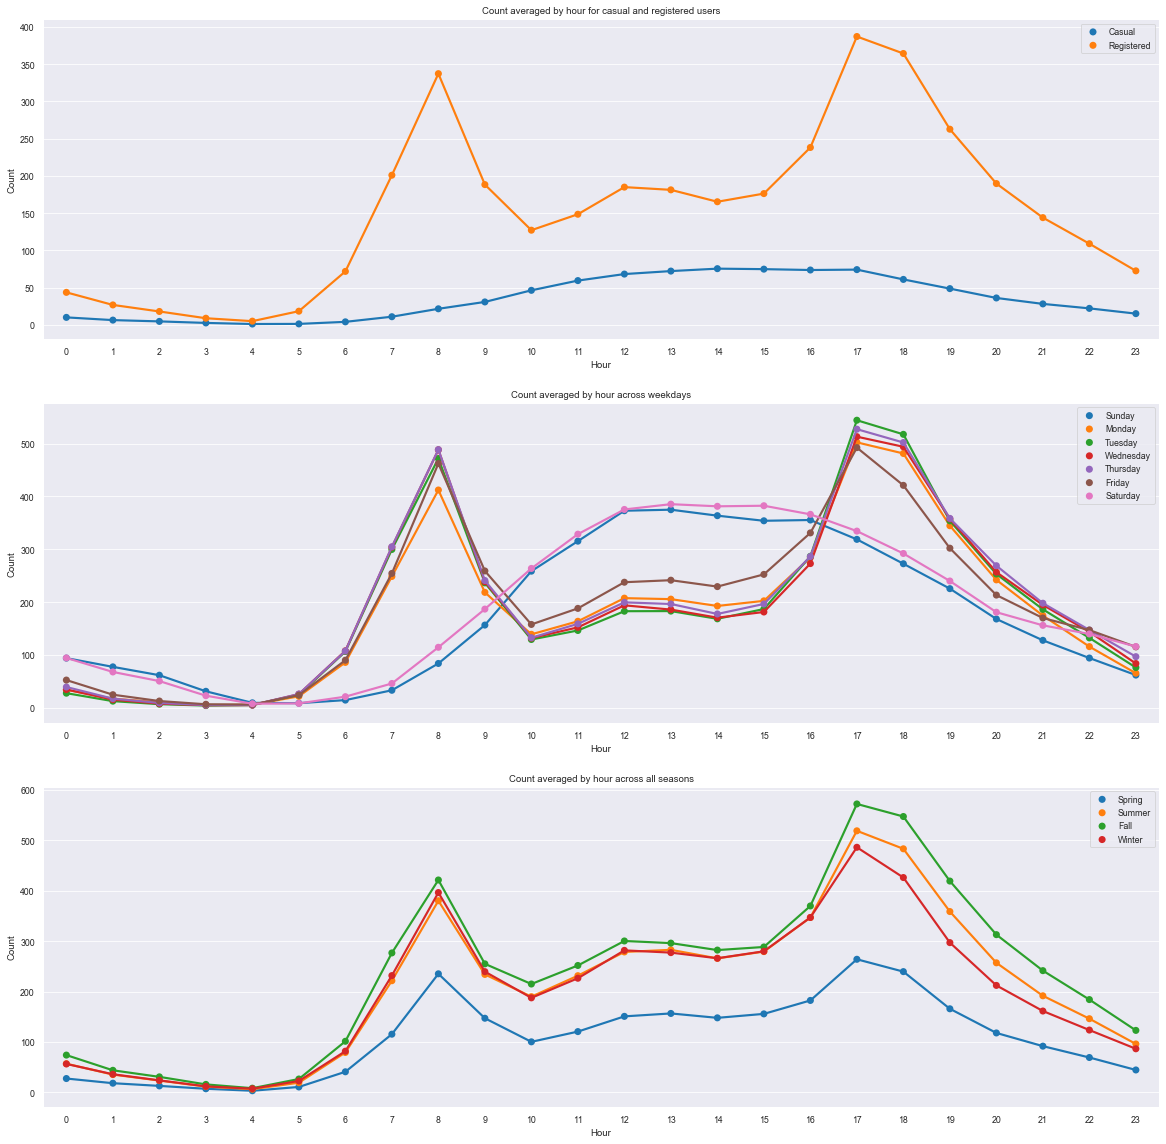

In [17]:
day_label = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
seaon_label = ['Spring', 'Summer', 'Fall', 'Winter']

_,ax = pyplot.subplots(ncols=1,nrows=3, figsize=(20, 20))


melted = pd.melt(interm_df[['hr','casual','registered']], id_vars=['hr'], value_vars=['casual', 'registered'])
hours = pd.DataFrame(melted.groupby(['hr', 'variable'])['value'].mean()).reset_index()
g = sns.pointplot(x=hours['hr'], y=hours['value'],hue=hours['variable'], data=hours,ax=ax[0], legend_out = True)
g.set(xlabel='Hour', ylabel='Count')
handles, _ = ax[0].get_legend_handles_labels()
ax[0].legend(handles, ['Casual', 'Registered'])
ax[0].set(xlabel='Hour', ylabel='Count',title='Count averaged by hour for casual and registered users')

hours = pd.DataFrame(interm_df.groupby(['hr','weekday'])['cnt'].mean()).reset_index()
sns.pointplot(x=hours['hr'], y=hours['cnt'],hue=hours['weekday'], data=hours,ax=ax[1], legend_out = True)
ax[1].set(xlabel='Hour', ylabel='Count',title='Count averaged by hour across weekdays')
handles, _ = ax[1].get_legend_handles_labels()
ax[1].legend(handles, day_label)


hours = pd.DataFrame(interm_df.groupby(['hr','season'])['cnt'].mean()).reset_index()
sns.pointplot(x=hours['hr'], y=hours['cnt'],hue=hours['season'], data=hours,ax=ax[2])
handles, _ = ax[2].get_legend_handles_labels()
ax[2].set(xlabel='Hour', ylabel='Count',title='Count averaged by hour across all seasons')
ax[2].legend(handles, seaon_label)


#melted_month = pd.melt(interm_df[['mnth','casual','registered']], id_vars=['mnth'], value_vars=['casual', 'registered'])
#month = pd.DataFrame(melted_month.groupby(['mnth', 'variable'])['value'].mean()).reset_index()
#sns.catplot(x='mnth', y='value', hue='variable', data=month, ax=ax[3], kind='bar')

## Cleaning

(17379, 15)
(17135, 15)


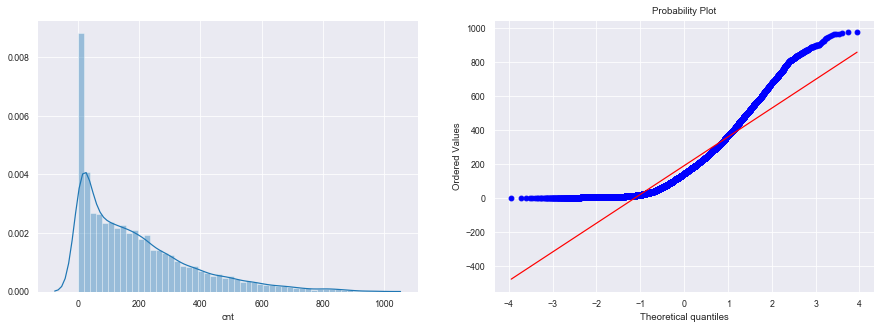

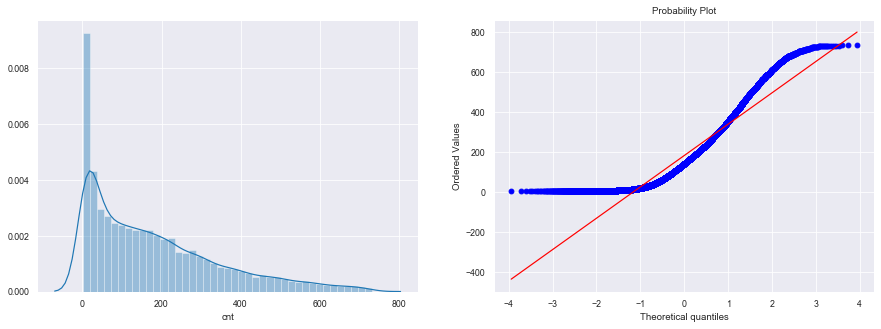

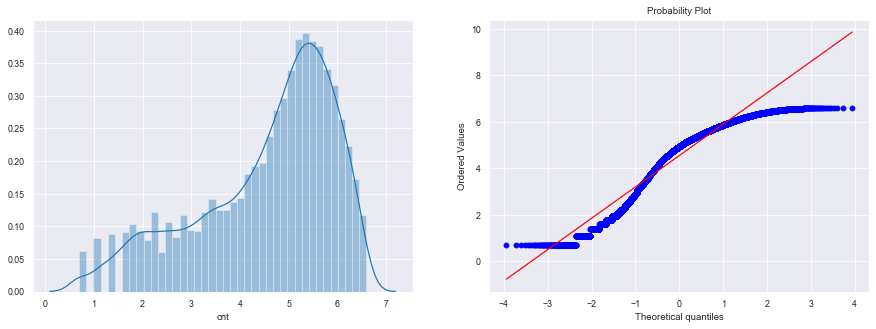

In [18]:
print(interm_df.shape)
no_outlier_df = interm_df[np.abs(interm_df['cnt'] - interm_df['cnt'].mean()) <= (3 * interm_df["cnt"].std())]
log_scale_df = np.log1p(no_outlier_df[['cnt']])
print(no_outlier_df.shape)
plot_dist(interm_df)
plot_dist(no_outlier_df)
plot_dist(log_scale_df)

## Windspeed

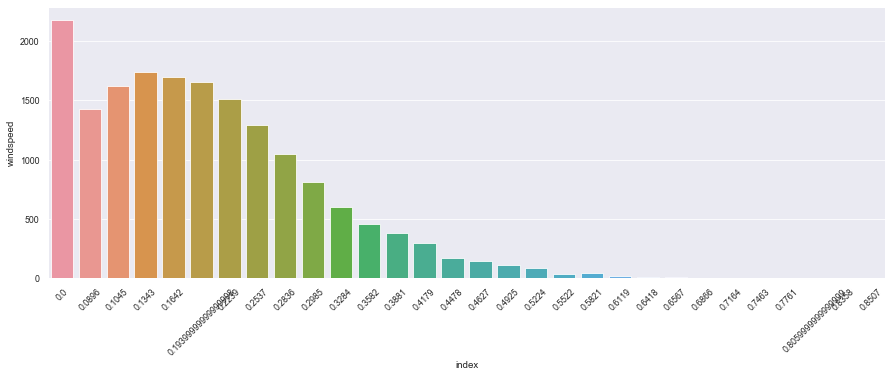

In [19]:
def plot_windspeed(df):
    windspeed_df = pd.DataFrame(df.windspeed.value_counts()).reset_index()
    _,ax = pyplot.subplots(figsize=(15, 5))
    pyplot.xticks(rotation=45) 
    sns.barplot(data=windspeed_df,x="index",y="windspeed")
    
plot_windspeed(interm_df)

### Replace 0.0 values with predicted values from RF

In [20]:
from sklearn.ensemble import RandomForestClassifier

wind_cols= ['season', 'yr', 'mnth', 'weathersit', 'temp', 'hum']
df_windspeed_0 = interm_df[interm_df['windspeed'] == 0.0]
df_windspeed_not_0 = interm_df[interm_df['windspeed'] > 0.0]

assert len(df_windspeed_0) + len(df_windspeed_not_0) == len(interm_df)

df_windspeed_not_0['windspeed'] = df_windspeed_not_0['windspeed'].astype('str')

rf_windspeed = RandomForestClassifier()
rf_windspeed.fit(df_windspeed_not_0[wind_cols], df_windspeed_not_0['windspeed'])

pred_windspeed = rf_windspeed.predict(df_windspeed_0[wind_cols])

df_windspeed_0["windspeed"] = pred_windspeed
interm_df_windspeed = df_windspeed_not_0.append(df_windspeed_0)
interm_df_windspeed["windspeed"] = interm_df_windspeed["windspeed"].astype("float")
interm_df_windspeed.reset_index(inplace=True)
interm_df_windspeed.drop('index',inplace=True,axis=1)

/Users/georges/.pyenv/versions/bikeshare/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/georges/.pyenv/versions/bikeshare/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


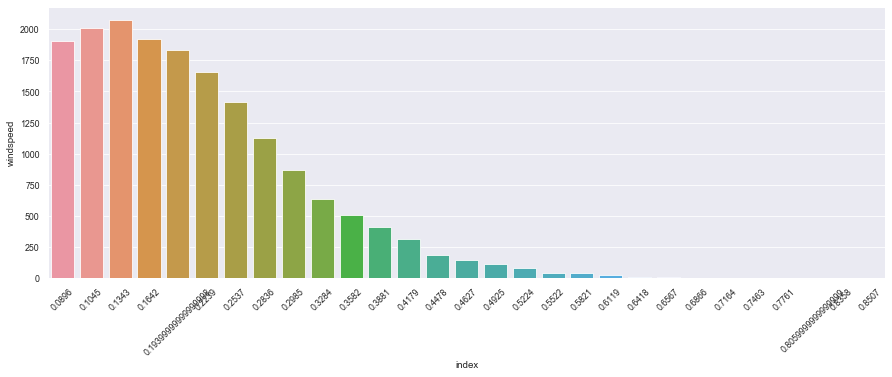

In [21]:
plot_windspeed(interm_df_windspeed)

## Model

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, mean_squared_error, mean_squared_log_error
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
from sklearn.gaussian_process import GaussianProcessRegressor

data = interm_df_windspeed

In [23]:
def plot_compare_density(y, pred, bins=100, **kwargs):
    fig ,ax = pyplot.subplots(ncols=2,nrows=1, figsize=(15, 5), **kwargs)
    sns.distplot(y,ax=ax[0], bins=bins)
    sns.distplot(pred ,ax=ax[1], bins=bins)
    return fig, ax

## Pipeline

In [24]:
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import GridSearchCV

SEED=42
np.random.seed(SEED)
import random
random.seed(SEED)

In [25]:
X, y, pipeline = build_features.build_sklearn_pipline(data)
result = train_model.cross_val(pipeline,X,y,train_model.rmsle,10, return_estimator=True, return_train_score=True, n_jobs=-1)

### Results stated in the report

In [26]:
np.mean(result['test_score']), result['test_score'], result['train_score'] 

(0.3282002401385477,
 array([0.42967421, 0.34550831, 0.27493728, 0.35460886, 0.37737309,
        0.32377362, 0.25216821, 0.241355  , 0.36802856, 0.31457524]),
 array([0.22902405, 0.23211884, 0.23877547, 0.23227238, 0.23214038,
        0.23279204, 0.23910938, 0.24019659, 0.23090939, 0.23420727]))

In [28]:
split_ration = 0.4

X, y, pipeline = build_features.build_sklearn_pipline(data)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=split_ration, random_state=SEED)
pipeline.fit(X_train, np.log(y_train))
pred = pipeline.predict(X_test)
score = train_model.rmsle(np.log(y_test), pred)
print('RMSLE', score)
print('MAD test', 'MAD pred')
train_model.mean_absolute_deviation(y_test), train_model.mean_absolute_deviation(np.exp(pred))

RMSLE 0.2928804813328515
MAD test MAD pred


(143.41886233531656, 140.0098128612733)

Text(0.5, 1.0, 'Predicted Data')

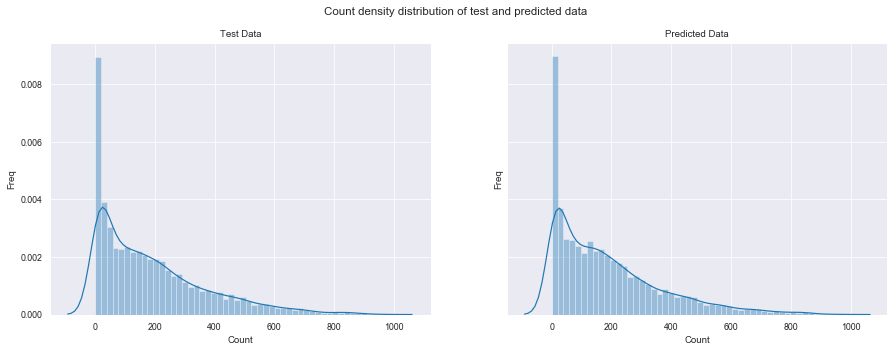

In [29]:
fig, axes = plot_compare_density(y_test, np.exp(pred),bins=50, sharex=True, sharey=True)
fig.suptitle('Count density distribution of test and predicted data')
for ax in axes:
    ax.set(xlabel='Count', ylabel='Freq')
    
axes[0].set_title('Test Data')
axes[1].set_title('Predicted Data')

## Feature Importance

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

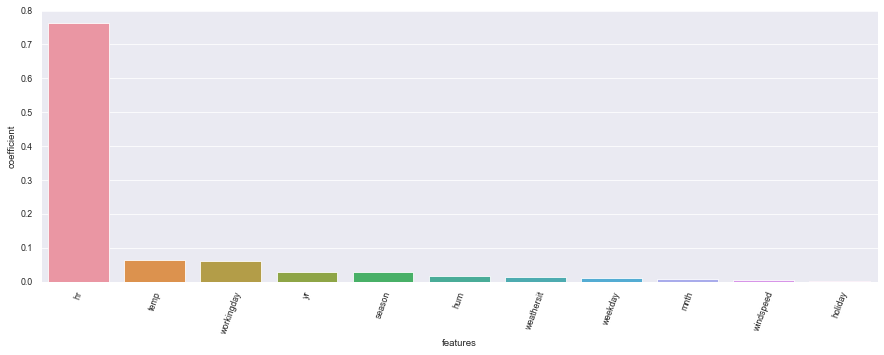

In [30]:
features = pd.DataFrame()
features['features'] = ['temp', 'hum', 'windspeed', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
features['coefficient'] = pipeline['gradientboostingregressor'].feature_importances_
features.sort_values(by=['coefficient'],ascending=False,inplace=True)

fig,ax = pyplot.subplots(figsize=(15, 5))
sns.barplot(data=features,x="features",y="coefficient",ax=ax)
pyplot.xticks(rotation=70)

In [31]:
features

,features,coefficient
6,hr,0.764038
0,temp,0.065006
9,workingday,0.059353
4,yr,0.028439
3,season,0.026928
1,hum,0.016889
10,weathersit,0.014517
8,weekday,0.011118
5,mnth,0.008789
2,windspeed,0.003274
